Archive:  archive.zip
  inflating: Mall_Customers.csv      
📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_Income_(k$)      200 non-null    int64 
 4   Spending_Score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

❗ Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

🔍 Sample Data:
   CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score_(1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81


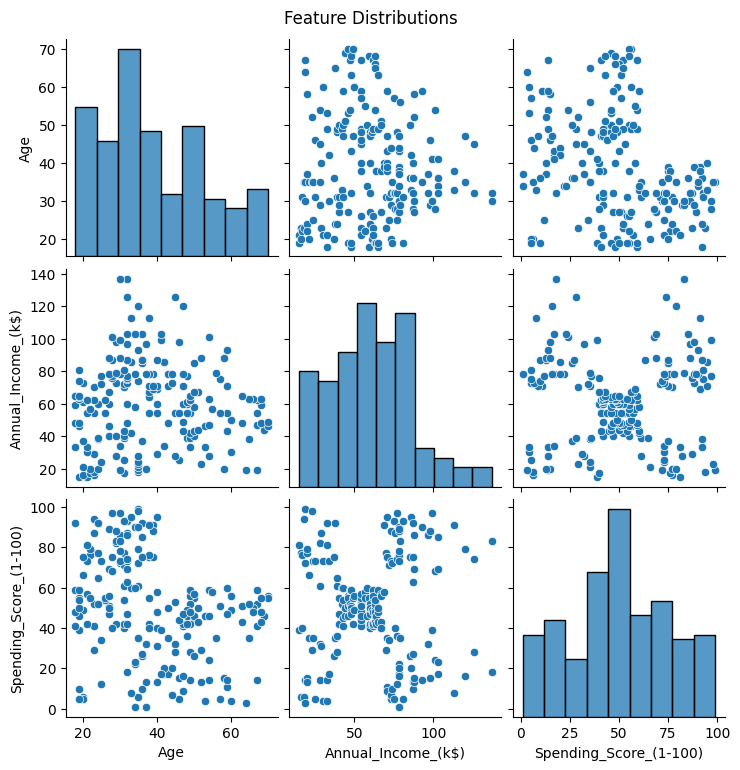

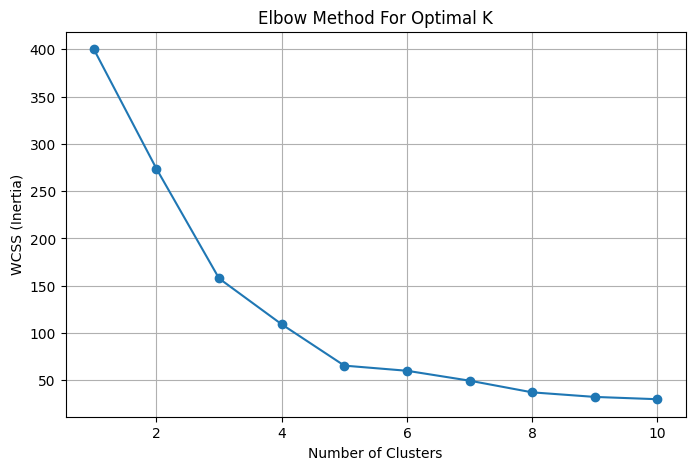

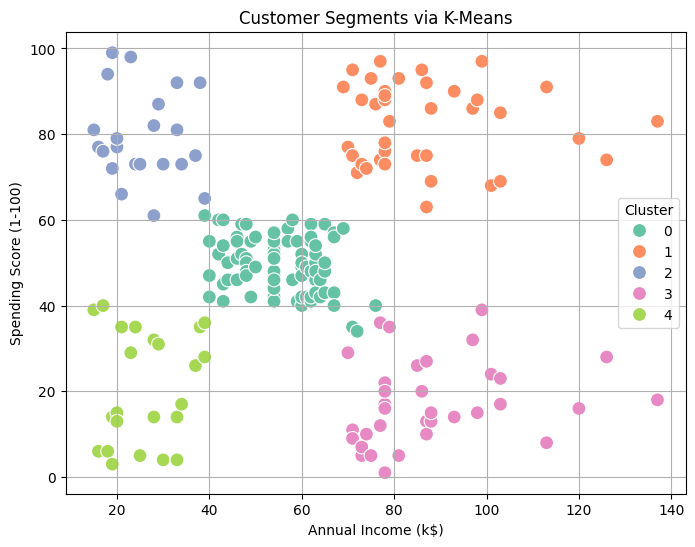


📊 Cluster-wise Mean Values:
               Age  Annual_Income_(k$)  Spending_Score_(1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [ ]:
# STEP 1: Unzip the dataset
!unzip -o archive.zip

# STEP 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# STEP 3: Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# STEP 4: Clean column names
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# STEP 5: Basic info and missing values
print("📄 Dataset Info:")
print(df.info())

print("\n❗ Missing Values:")
print(df.isnull().sum())

# STEP 6: Quick look at the data
print("\n🔍 Sample Data:")
print(df.head())

# STEP 7: Visualize distributions
sns.pairplot(df[['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']])
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# STEP 8: Select features for clustering
features = df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']]

# STEP 9: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# STEP 10: Elbow method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

# STEP 11: Apply KMeans with K=5 (you can change this)
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

# STEP 12: Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=features['Annual_Income_(k$)'],
                y=features['Spending_Score_(1-100)'],
                hue=df['Cluster'],
                palette='Set2', s=100)
plt.title('Customer Segments via K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# STEP 13: Cluster summary
print("\n📊 Cluster-wise Mean Values:")
print(df.groupby('Cluster')[['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']].mean())

